In [61]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# import matplotlib.style as style 
# style.available

# style.use('dark_background')

# style.available

In [62]:
# lIn = []
# with open('In-Lab Data Collection - Sheet1.csv', newline='') as csvfile:
#     spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
#     for row in spamreader:
#         for i in row:
#             lIn += [i.split('\t')]


# lIn

In [63]:
# R_a = [16.6807611, 9.018538713, 13.68821293, 109.1766268, 255.3191489, 336.3636364, 120000]
# R_a_err = []

V_1 = [6.37, 6.41, 6.42, 6.43, 6.44, 6.44, 6.45]
V_1_err = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

I_1 = [18.92, 9.17, 7.89, 0.753, 0.188, 0.077, 0.005]
I_1_err = [0.01, 0.01, 0.01, 0.001, 0.001, 0.001, 0.001]


V_2 = [6.20, 6.33, 6.32, 6.35, 6.41, 6.42, 6.43]
V_2_err = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03] # would be 0.026847754 but we use only 1 sig fig for error.

I_2 = [18.91, 9.15, 7.88, 0.752, 0.188, 0.077, 0.006]
I_2_err = [0.01, 0.01, 0.01, 0.001, 0.001, 0.001, 0.001]
# R = [320, 690, 800, 8430, 34000, 83300, 1170000]
# R_err = [1, 1, 1, 10, 100, 100, 10000]



# R_v = [-13333.33333, -264709.0909, -316000, -5031062.03, -12107777.78, -90641694.92, 12751016.95]
# R_v_err = [2000, 200000, 300000, 6000000, 10000000, 200000000, 1000000]

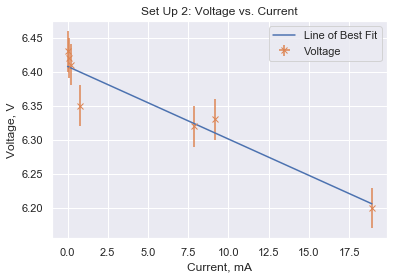

In [67]:
### V_2 vs. I_2
fig, ax1 = plt.subplots()

# ax1.scatter(R, V_2, label='Voltage', color='C1')
ax1.errorbar(I_2, V_2, xerr=I_2_err, yerr=V_2_err, label='Voltage', color='C1', fmt='x')

ax1.set_title('Set Up 2: Voltage vs. Current')
ax1.set_xlabel('Current, mA')
ax1.set_ylabel('Voltage, V')

ax1.plot(np.unique(I_2), np.poly1d(np.polyfit(I_2, V_2, 1))(np.unique(I_2)), label='Line of Best Fit')

# plt.ylim(0, min(V_2)*1.1)

ax1.legend(loc="upper right")

plt.savefig('exports/2.png', dpi=600)
plt.show()

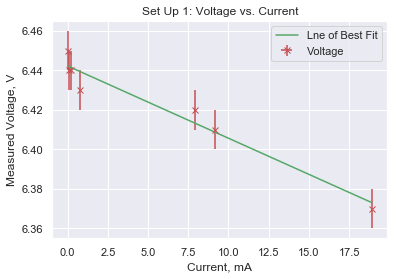

In [68]:
### V_1 vs. I_1
fig, ax1 = plt.subplots()

ax1.errorbar(I_1, V_1, xerr=I_1_err, yerr=V_1_err, label='Voltage', color='C3', fmt='x')

ax1.set_title('Set Up 1: Voltage vs. Current')
ax1.set_xlabel('Current, mA')
ax1.set_ylabel('Measured Voltage, V')

ax1.plot(np.unique(I_1), np.poly1d(np.polyfit(I_1, V_1, 1))(np.unique(I_1)), color='C2', label='Lne of Best Fit')

# plt.ylim(0, min(V_1)*1.1)

ax1.legend(loc="upper right")

plt.savefig('exports/1.png', dpi=600)
plt.show()

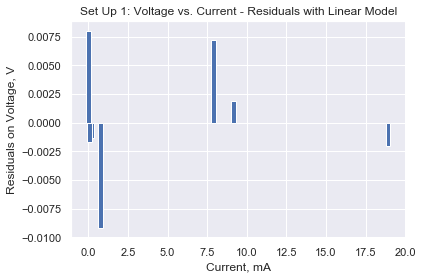

In [80]:
### Residuals: V_1 vs. I_1
m = -0.0037;
b = 6.442;

sigma = 0.01;
X2 = 0;

res = [];

for i in range(0, len(V_1)):
    res += [V_1[i]-(m*I_1[i]+b)]

fig, ax1 = plt.subplots()
    
ax1.bar(I_1, res, width=0.3);

ax1.set_title('Set Up 1: Voltage vs. Current - Residuals with Linear Model')
ax1.set_xlabel('Current, mA');
ax1.set_ylabel('Residuals on Voltage, V')

plt.savefig('exports/1_residuals.png', dpi=600)
plt.show();

print('Chi Squared is {} for Set Up 1'.format(X2))

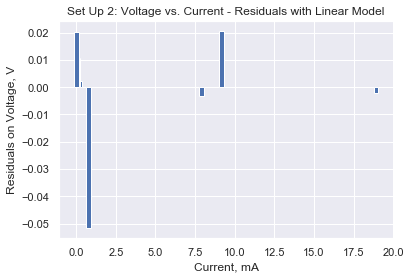

Chi Squared is 36.417693730000586 for Set Up 2


In [86]:
### Residuals: V_2 vs. I_2
m = -0.011;
b = 6.41;

sigma = 0.01; # Reading error for y (voltage), used in X2
X2 = 0;

res = [];

for i in range(0, len(V_2)):
    res += [V_2[i]-(m*I_2[i]+b)]
    X2 += ((V_2[i]-(m*I_2[i]+b))/sigma)*((V_2[i]-(m*I_2[i]+b))/sigma)

fig, ax1 = plt.subplots()
    
ax1.bar(I_2, res, width=0.3);

ax1.set_title('Set Up 2: Voltage vs. Current - Residuals with Linear Model')
ax1.set_xlabel('Current, mA');
ax1.set_ylabel('Residuals on Voltage, V')

plt.savefig('exports/2_residuals.png', dpi=600)
plt.show();

print('Chi Squared is {} for Set Up 2'.format(X2))